In [14]:
from sensitivity_tests import *
import pandas as pd


[[0. 3. 4. 2. 3. 2. 3. 4. 3. 2. 1. 3. 3. 2. 2. 2. 3. 3. 5. 4. 2. 4. 3. 4.
  4. 4. 2. 3. 4. 3. 4. 2. 3. 1. 2. 4. 3. 2. 3. 4. 3. 3. 2. 5. 4. 2. 4. 3.
  3. 4.]
 [2. 0. 4. 4. 4. 3. 3. 2. 4. 2. 2. 3. 1. 5. 4. 3. 3. 4. 4. 4. 2. 2. 2. 5.
  3. 1. 0. 3. 3. 2. 3. 3. 2. 2. 2. 1. 4. 2. 2. 3. 3. 4. 3. 5. 3. 5. 2. 3.
  5. 5.]
 [1. 1. 0. 2. 1. 4. 3. 3. 5. 0. 2. 3. 2. 2. 2. 3. 1. 4. 3. 3. 3. 3. 3. 2.
  1. 3. 2. 3. 4. 3. 2. 3. 4. 3. 3. 3. 4. 2. 3. 1. 2. 5. 3. 4. 3. 4. 1. 2.
  4. 3.]
 [3. 1. 3. 0. 3. 2. 3. 2. 0. 3. 3. 4. 2. 4. 4. 2. 1. 3. 2. 4. 4. 0. 3. 1.
  3. 2. 3. 0. 4. 4. 3. 4. 2. 3. 1. 5. 4. 1. 4. 2. 3. 2. 3. 0. 3. 3. 4. 4.
  3. 3.]
 [2. 1. 4. 2. 0. 3. 1. 2. 2. 1. 3. 4. 3. 4. 1. 3. 2. 3. 1. 4. 2. 4. 1. 1.
  1. 4. 3. 4. 4. 1. 2. 2. 1. 1. 3. 1. 3. 2. 2. 2. 4. 1. 1. 2. 2. 3. 2. 3.
  4. 3.]
 [3. 2. 1. 3. 2. 0. 3. 2. 3. 1. 3. 2. 2. 2. 2. 2. 3. 4. 2. 5. 2. 3. 5. 3.
  2. 1. 2. 3. 3. 3. 3. 2. 4. 3. 4. 2. 3. 3. 3. 4. 4. 3. 3. 1. 2. 3. 3. 3.
  4. 2.]
 [2. 2. 2. 2. 4. 2. 0. 2. 1. 4. 3. 1. 2. 3. 4. 4. 3. 2. 4.

[0.0,
 -3.8417654178779514e-05,
 0.010712254809673971,
 0.003519301590569346,
 0.008863413524369479,
 0.011302800764436016,
 0.0016752488821427658,
 0.011943240124964394,
 0.0003156895934756099,
 -0.006012714735732172,
 0.005350741096492917,
 -0.0012824653693692678,
 0.00010382883020720879,
 -0.0021275483422781294,
 -0.005937837382825606,
 0.027510153276948057,
 0.016242423195883204,
 -0.0055777064046909075,
 0.012403602872344766,
 0.0011457964094854223,
 -0.0060191661209497704,
 -0.006476675104106766,
 -0.002407811475482746,
 -0.002348545925031642,
 0.007676631088717745,
 0.0322280577420081,
 -0.00286728023750793,
 0.006442948731488096,
 0.0018708894458550063,
 -0.017402069212573923]

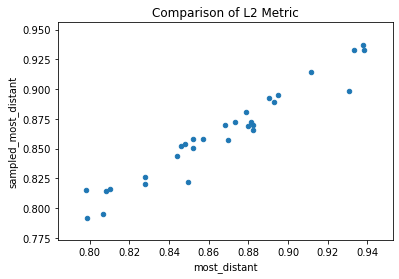

In [30]:

eloTournament = SynthELOTournamentSource(50, 5, 80, 800)
smalleloTournament = SynthELOTournamentSource(4, 5, 80, 800)
l2dm = L2DifferenceMetric("max")
    
eloMatrix = eloTournament.init_D()
smalleloMatrix = smalleloTournament.init_D()
print(eloMatrix)
    #k, details = pyrankability.hillside.bilp_two_most_distant(eloMatrix)
    #print(details["perm_x"],details["perm_y"])
    #print(details["x"],details["y"])
k, details = pyrankability.hillside.bilp_two_most_distant(eloMatrix)
print(k)
print(details)
print(l2dm._compute(k, [details["perm_x"],details["perm_y"]]))
k, details = pyrankability.hillside.bilp_two_most_distant(smalleloMatrix)
print(k)
print(details)
print(l2dm._compute(k, [details["perm_x"],details["perm_y"]]))

most_dist = []
sampled_dist = []
for i in range(30):     
    eloMatrix = eloTournament.init_D()
    k, details = pyrankability.hillside.bilp(eloMatrix, num_random_restarts=10, find_pair=True)
    
    sampled_dist.append(l2dm._compute(k, details["P"]))
    
    k_most, details_most = pyrankability.hillside.bilp_two_most_distant(eloMatrix)
    
    most_dist.append(l2dm._compute(k_most, [details_most["perm_x"],details_most["perm_y"]]))
    
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")

[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [ ]:
sampled_dist

In [ ]:
most_dist

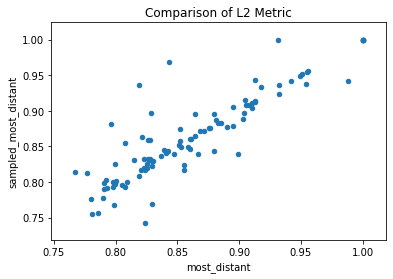

In [18]:
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")

In [ ]:
[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

,most_distant,sampled_most_distant
0,0.879584,0.879584
1,0.859311,0.853444
2,0.941991,0.899625
3,0.871709,0.864937
4,0.862112,0.862112
5,0.924536,0.924536
6,0.940949,0.940949
7,0.871968,0.873264
8,0.930039,0.923141
9,0.919469,0.919469


[0.0,
 0.005867368637435311,
 0.04236677071997186,
 0.006771607576789851,
 0.0,
 0.0,
 0.0,
 -0.0012969294337271675,
 0.006897386433929675,
 0.0,
 0.03696204156643157,
 0.0,
 0.003235381646891855,
 -0.02029752211108604,
 0.024945649190467822,
 0.010756449988651329,
 -0.011345989707496118,
 0.00046490010390309866,
 0.032870824806634724,
 0.028099697774273125,
 0.0,
 -0.0031587531757353293,
 0.0,
 0.01006650235203177,
 -0.002163006233856013,
 0.003932752373069448,
 0.007340954284569157,
 0.0,
 0.0,
 0.028988479180045768,
 0.03758291515213563,
 0.004147560174480813,
 0.007447050867367411,
 0.0,
 0.0050474183631685765,
 -0.0004789795866005919,
 0.010434951622182553,
 -0.008001571388380535,
 0.03646289739881703,
 0.009565204544045858,
 0.0,
 -0.014498226625736077,
 0.0,
 0.021160197126168012,
 0.0050377985628349276,
 -0.0008042398942317286,
 0.0,
 0.007185864457582958,
 0.0004930805684096873,
 0.00964231214408151,
 0.05918982859027644,
 0.03602655956632528,
 0.003949800869295417,
 0.0067702

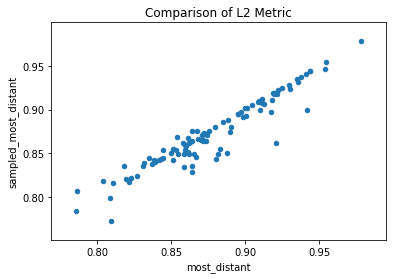

In [27]:
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(comp)
[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [29]:
comp.to_csv(index=True)

',most_distant,sampled_most_distant\n0,0.8795836926311467,0.8795836926311467\n1,0.8593113024479242,0.8534439338104889\n2,0.9419912899917634,0.8996245192717915\n3,0.8717086652601719,0.864937057683382\n4,0.8621124156774673,0.8621124156774673\n5,0.9245363629101782,0.9245363629101782\n6,0.9409487816745586,0.9409487816745586\n7,0.8719675453307631,0.8732644747644903\n8,0.930038585523635,0.9231411990897054\n9,0.9194690839789671,0.9194690839789671\n10,0.8091446360178327,0.7721825944514011\n11,0.9095757661481567,0.9095757661481567\n12,0.9110559012640087,0.9078205196171169\n13,0.7864259053515855,0.8067234274626716\n14,0.8584822594357266,0.8335366102452588\n15,0.8904462462779691,0.8796897962893178\n16,0.8643867206353933,0.8757327103428895\n17,0.8642827742593047,0.8638178741554016\n18,0.8819141841116771,0.8490433593050424\n19,0.8828070702298675,0.8547073724555944\n20,0.9115550593058656,0.9115550593058656\n21,0.8515865569993092,0.8547453101750445\n22,0.8715965473670019,0.8715965473670019\n23,0.9099

[0.0,
 -3.8417654178779514e-05,
 0.010712254809673971,
 0.003519301590569346,
 0.008863413524369479,
 0.011302800764436016,
 0.0016752488821427658,
 0.011943240124964394,
 0.0003156895934756099,
 -0.006012714735732172,
 0.005350741096492917,
 -0.0012824653693692678,
 0.00010382883020720879,
 -0.0021275483422781294,
 -0.005937837382825606,
 0.027510153276948057,
 0.016242423195883204,
 -0.0055777064046909075,
 0.012403602872344766,
 0.0011457964094854223,
 -0.0060191661209497704,
 -0.006476675104106766,
 -0.002407811475482746,
 -0.002348545925031642,
 0.007676631088717745,
 0.0322280577420081,
 -0.00286728023750793,
 0.006442948731488096,
 0.0018708894458550063,
 -0.017402069212573923]

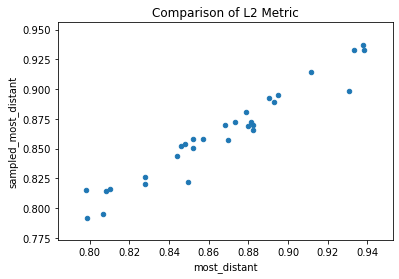

In [31]:
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")

[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [32]:
comp.to_csv(index=True)

',most_distant,sampled_most_distant\n0,0.9375338756604461,0.9375338756604461\n1,0.9331724960788309,0.9332109137330097\n2,0.8797649686856025,0.8690527138759285\n3,0.8927351125097996,0.8892158109192303\n4,0.881385464105261,0.8725220505808915\n5,0.8066180126061366,0.7953152118417006\n6,0.8276792114199413,0.8260039625377985\n7,0.869695092457078,0.8577518523321136\n8,0.8440910385704933,0.8437753489770177\n9,0.8085019297223343,0.8145146444580664\n10,0.9383002174282526,0.9329494763317597\n11,0.8572188203187499,0.8585012856881191\n12,0.8949252494670027,0.8948214206367955\n13,0.8681104119623032,0.8702379603045813\n14,0.8482107134345155,0.8541485508173411\n15,0.8494977916757789,0.8219876383988308\n16,0.8821608302221792,0.865918407026296\n17,0.8104690061200741,0.816046712524765\n18,0.8824766419102356,0.8700730390378908\n19,0.873236712053022,0.8720909156435366\n20,0.8459530484874198,0.8519722146083696\n21,0.8521287871090435,0.8586054622131503\n22,0.8785750969039589,0.8809829083794416\n23,0.8903356